<a href="https://colab.research.google.com/github/Nick-FF/NeuroNets_Begining/blob/less2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Код нейронной сети в Keras!
###############################
import numpy as np
# import mnist
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist  # наборы для работы
from keras.models import Sequential
from keras.layers import Dense
# from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_imagesi,train_labels),(test_imagesi,test_labels) = fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [2]:
n=1
train_imagesi[n,:,:].shape

(28, 28)

In [3]:
keras.backend.backend()

'tensorflow'

In [4]:
import matplotlib.pyplot as plt

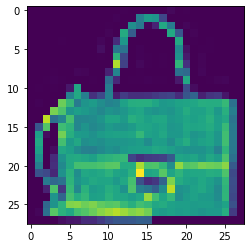

8


In [5]:
n = 2005
plt.imshow(train_imagesi[n,:,:])
plt.show()
print(train_labels[n])

In [6]:
train_labels[:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

In [7]:
train_images[202,150:160]

array([-0.5984252 , -0.62204724, -0.64566929, -0.56692913, -0.59055118,
       -0.62992126, -0.61417323, -0.61417323, -0.66929134, -0.58267717])

In [8]:
# Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
def fit_process(model, testn_labels):
  hh = model.fit( 
    train_images,
    to_categorical(train_labels),
    epochs=15,
    batch_size=1024, validation_split=0.2
  )

  # Evaluate the model.
  model.evaluate(
    test_images,
    to_categorical(testn_labels)
  )
  return hh

Задание 1. Работа с двухслойной сетью

In [24]:
model_list=[]
fit_list=[]

def gen_model(layers, neurons, optimizer_l):
  # model_list=[]
  # fit_list=[]
  i = 0 
  for n in layers:
    model1 = Sequential(name='my_model'+str(n)+str(neurons[i])+optimizer_l+'.h5')
    model1.add(Dense(    128, activation='relu', input_shape=(784,)))  
    # входной слой + поносвязный слой из 128 нейронов с активацией ReLU
   
    for k in range(n):
     
      model1.add(Dense((10+(10+neurons[i]-k))*10, activation='tanh')) 
      
      # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
    

    model1.add(Dense(10, activation='softmax')) 
    # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

    model1.compile(
      optimizer= optimizer_l, # оптимизатор
      loss=keras.losses.CategoricalCrossentropy(), # функция потерь
      metrics=['accuracy'], # метрика
    ) 
    model1.summary()
    model_list.append(model1.name)
    fit_list.append(fit_process(model1, test_labels))
    # сохранить веса модели.
    model1.save_weights(model_list[i])
    i+=1

  # загрузить веса модели:
  # model.load_weights(model_list[n])

Создаем 2 модели с 2 слоями нейронов и разным количеством нейронов в слое

In [15]:
model_list=[]
fit_list=[]
layers=(2,2)
neurons=(2,4)
optimizer_l=['adam']
gen_model(layers, neurons, optimizer_l)
print(fit_list, model_list)

Model: "my_model22.h5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 220)               28380     
                                                                 
 dense_14 (Dense)            (None, 210)               46410     
                                                                 
 dense_15 (Dense)            (None, 10)                2110      
                                                                 
Total params: 177,380
Trainable params: 177,380
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
47/47 [==============================] - 2s 38ms/step - loss: 0.7322 - accuracy: 0.7430 - val_loss: 0.4909 - val_accuracy: 0.8209
Epoch 2/15
47/47 [====================

In [11]:
y_t = to_categorical( train_labels)
y_tt = to_categorical(test_labels)

In [12]:
def plot_loss(history_list):
  plt.figure(figsize=(15,7))
  i=0
  for n in fit_list:  
    plt.plot(n.history['loss'], label = 'потери для тренировки '+ model_list[i])
    plt.plot(n.history['val_loss'], label = 'потери для валидации ' + model_list[i])
    i+=1
  plt.xlabel('эпох')
  plt.ylabel('loss')
  plt.legend()
  plt.grid('On')
  plt.title('потери от эпох')
  plt.show()
  

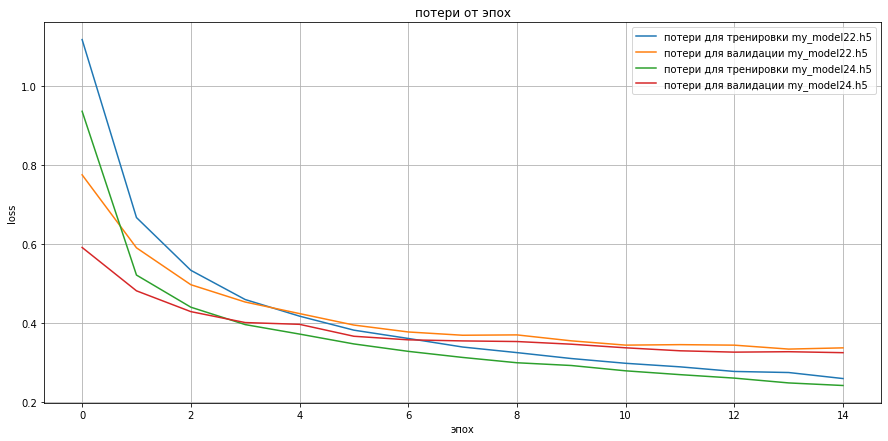

In [ ]:
plot_loss(fit_list)

При достаточной длительности обучения (в данном случае 13 эпох) сеть с количеством нейронов в 2 раза меньеше выходит на тот же уровень потерь, что и сеть с бОльшим количестовм нейронов

In [27]:
import pandas as pd

In [ ]:
for i in range(0, len(fit_list)):
  df= pd.DataFrame(fit_list[i].history)
  print(df.min())
  

loss            0.264181
accuracy        0.682250
val_loss        0.336262
val_accuracy    0.793583
dtype: float64
loss            0.250741
accuracy        0.706375
val_loss        0.328460
val_accuracy    0.805083
dtype: float64


Model: "my_model22.h5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_234 (Dense)           (None, 128)               100480    
                                                                 
 dense_235 (Dense)           (None, 220)               28380     
                                                                 
 dense_236 (Dense)           (None, 210)               46410     
                                                                 
 dense_237 (Dense)           (None, 10)                2110      
                                                                 
Total params: 177,380
Trainable params: 177,380
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
47/47 [==============================] - 2s 30ms/step - loss: 0.7134 - accuracy: 0.7499 - val_loss: 0.4776 - val_accuracy: 0.8266
Epoch 2/15
47/47 [====================

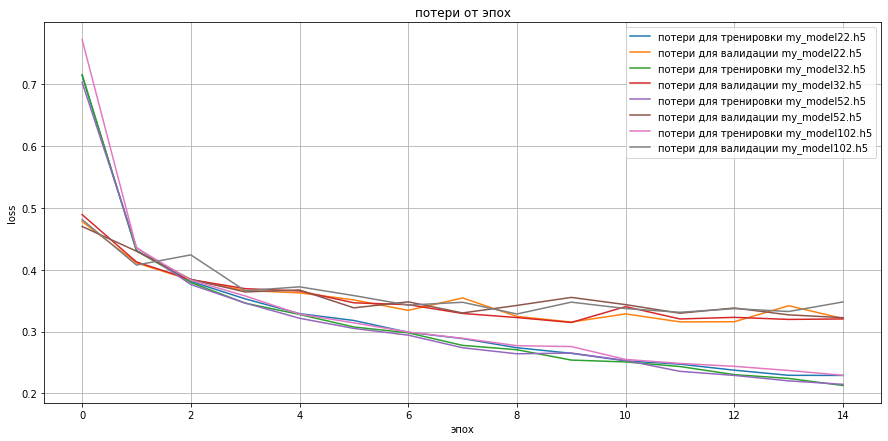

loss            0.229124
accuracy        0.749875
val_loss        0.315349
val_accuracy    0.826583
dtype: float64
loss            0.212890
accuracy        0.748812
val_loss        0.314653
val_accuracy    0.821917
dtype: float64
loss            0.214766
accuracy        0.753604
val_loss        0.322386
val_accuracy    0.829417
dtype: float64
loss            0.229368
accuracy        0.725583
val_loss        0.328356
val_accuracy    0.824917
dtype: float64


In [ ]:
model_list=[]
fit_list=[]
layers=(2,3,5,10)
neurons=(2,2,2,2)
gen_model(layers, neurons)
plot_loss(fit_list)
for i in range(0, len(fit_list)):
  df= pd.DataFrame(fit_list[i].history)
  print(df.min())

Применение разных оптимизаторов

In [25]:
model_list=[]
fit_list=[]
layers=(2,2)
neurons=(2,4)
for optimizer_l in ['SGD','RMSProp','adam','NAdam']:
  gen_model(layers, neurons, optimizer_l)
print(fit_list, model_list)

Model: "my_model22SGD.h5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               100480    
                                                                 
 dense_61 (Dense)            (None, 220)               28380     
                                                                 
 dense_62 (Dense)            (None, 210)               46410     
                                                                 
 dense_63 (Dense)            (None, 10)                2110      
                                                                 
Total params: 177,380
Trainable params: 177,380
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
47/47 [==============================] - 2s 33ms/step - loss: 1.6708 - accuracy: 0.5043 - val_loss: 1.2162 - val_accuracy: 0.6854
Epoch 2/15
47/47 [=================

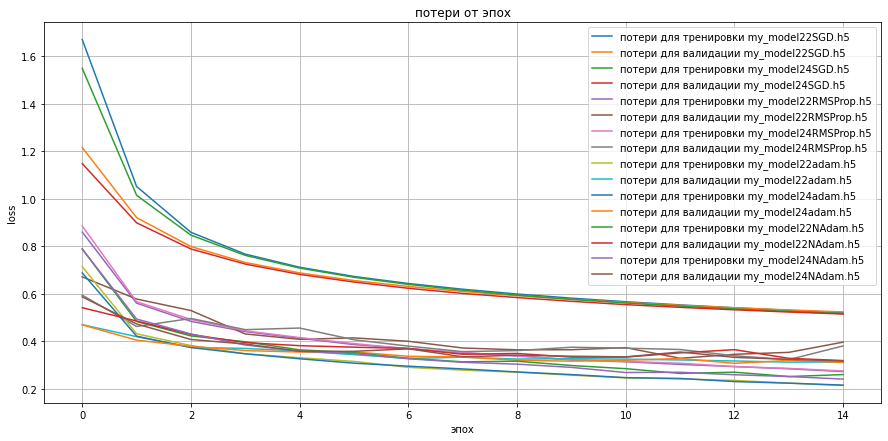

In [26]:
plot_loss(fit_list)

In [30]:
for i in range(0, len(fit_list)):
  df= pd.DataFrame(fit_list[i].history)
  print(df.min(),'\n', df.max())
  print('=============')


loss            0.521251
accuracy        0.504292
val_loss        0.523928
val_accuracy    0.685417
dtype: float64 
 loss            1.670785
accuracy        0.819938
val_loss        1.216196
val_accuracy    0.813500
dtype: float64
loss            0.516726
accuracy        0.523979
val_loss        0.515244
val_accuracy    0.672833
dtype: float64 
 loss            1.549570
accuracy        0.819667
val_loss        1.148448
val_accuracy    0.815000
dtype: float64
loss            0.272847
accuracy        0.689313
val_loss        0.328786
val_accuracy    0.746250
dtype: float64 
 loss            0.860368
accuracy        0.896854
val_loss        0.671575
val_accuracy    0.877000
dtype: float64
loss            0.275232
accuracy        0.681750
val_loss        0.323145
val_accuracy    0.774167
dtype: float64 
 loss            0.886057
accuracy        0.895917
val_loss        0.594608
val_accuracy    0.882000
dtype: float64
loss            0.214148
accuracy        0.749896
val_loss        0.3124

На итоговый результат влияет длительность обучение, выбор правильного опримизатора, а так же на скорость обучения влияет величина слоев и нейронов сети